In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:

def binarize(M, threshold=0.5):
    binary_matrix = (M > threshold).astype(int)
    return binary_matrix


In [16]:
def sum_prod(X, V):
    '''
    X - список p матриц (n, n)
    V - список p векторов (n, 1)
    Гарантируется, что len(X) == len(V)
    
    Возвращает сумму произведений всех матриц на соответствующие векторы.
    '''
    result = np.zeros_like(V[0])  # Инициализируем нулевой вектор для накопления суммы
    for i in range(len(X)):
        result += np.dot(X[i], V[i])  # Вычисляем произведение матрицы на вектор и добавляем к результату
    return result



In [9]:

def unique_rows(mat):

    unique_per_row = [np.unique(row) for row in mat]  
    return unique_per_row

def unique_columns(mat):
  
    unique_per_col = [np.unique(mat[:, col]) for col in range(mat.shape[1])] 
    return unique_per_col


Средние по строкам: [ 0.19816213  0.45711502  0.52913895  0.0219059  -0.87042092]
Дисперсии по строкам: [0.43744034 0.19855922 0.67652099 0.67197322 0.4731844 ]
Средние по столбцам: [ 0.27239329 -0.05960518  0.26945399 -0.21352124]
Дисперсии по столбцам: [0.96561103 0.66251976 0.37820241 0.79291996]


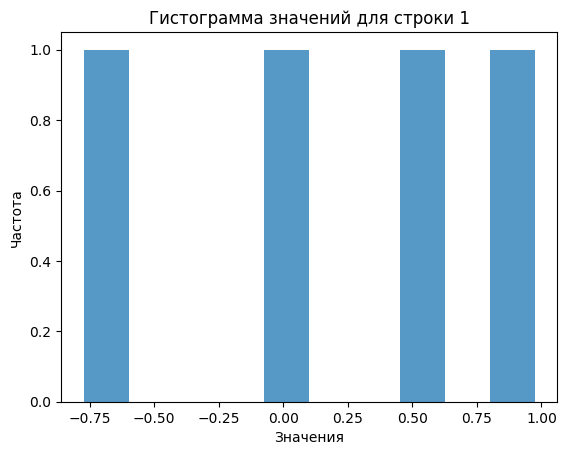

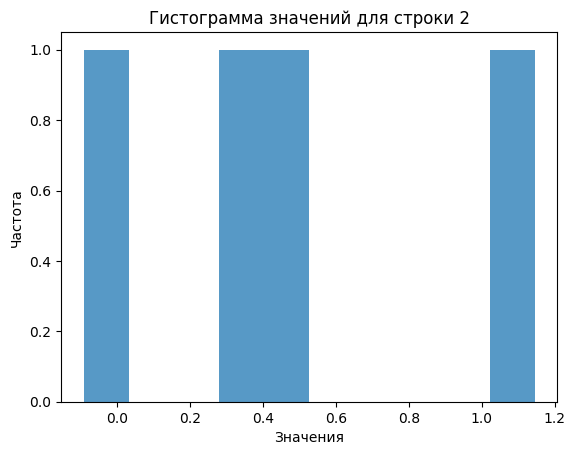

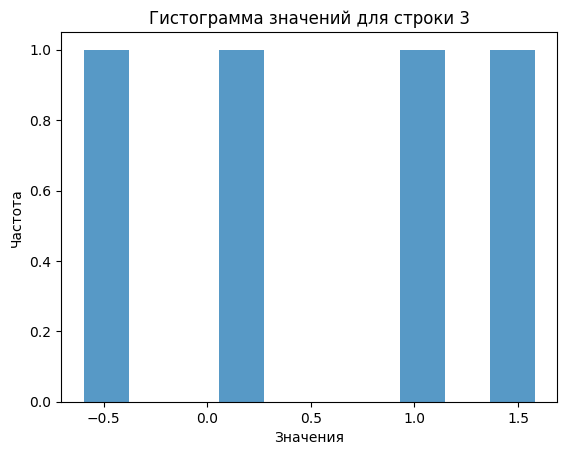

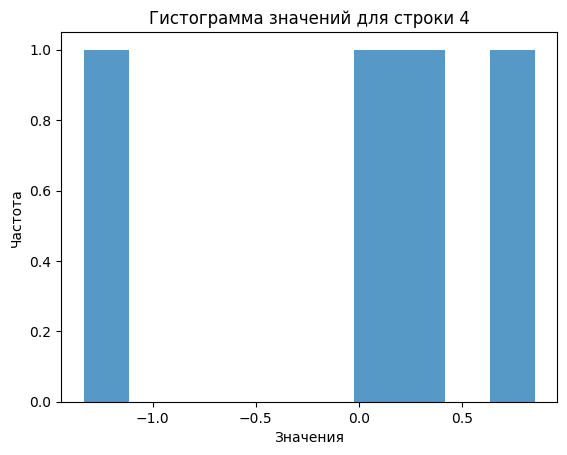

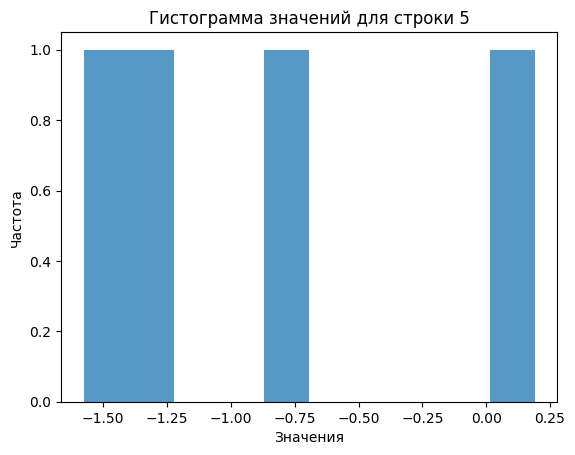

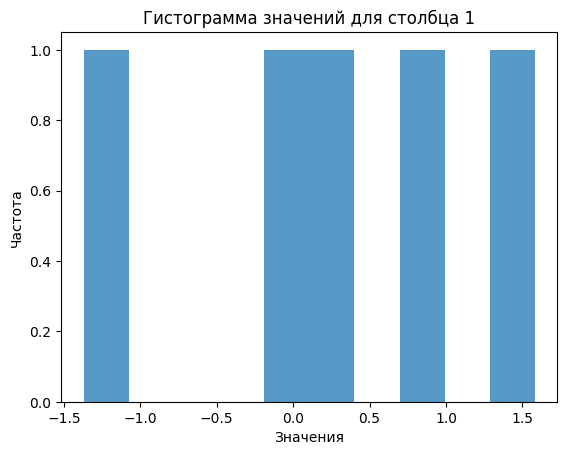

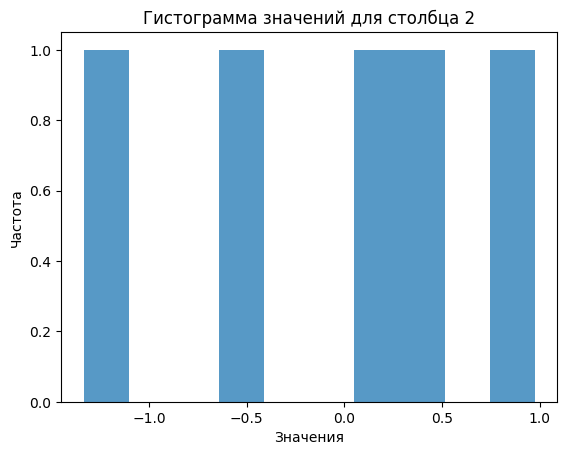

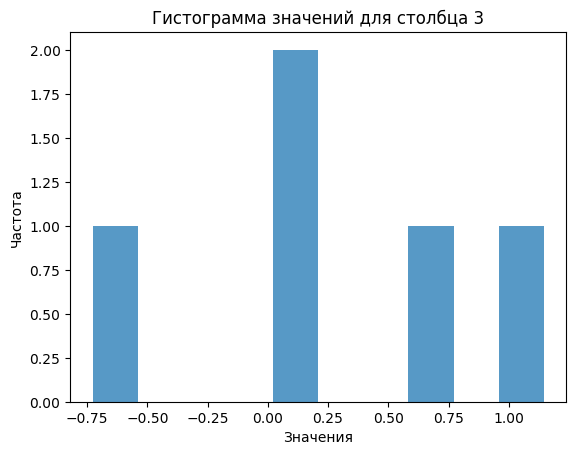

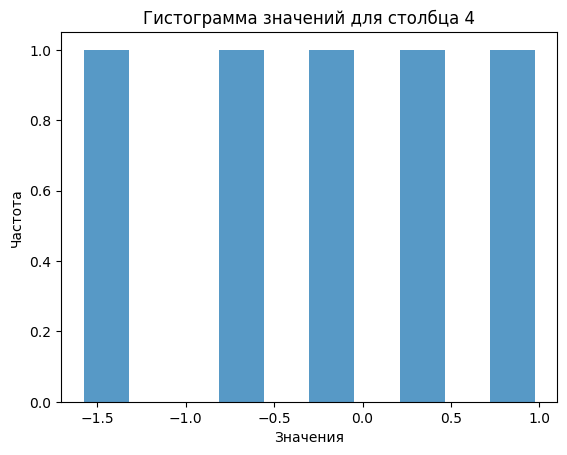

In [10]:
def generate_random_matrix(m, n): 
    matrix = np.random.randn(m, n)  
    return matrix
def calculate_statistics(matrix):  
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    return row_means, row_vars, col_means, col_vars
def plot_histograms(matrix):
    m, n = matrix.shape 
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10, alpha=0.75)
        plt.title(f"Гистограмма значений для строки {i+1}")
        plt.xlabel("Значения")
        plt.ylabel("Частота")
        plt.show()  
    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.75)
        plt.title(f"Гистограмма значений для столбца {j+1}")
        plt.xlabel("Значения")
        plt.ylabel("Частота")
        plt.show()
m, n = 5, 4  
matrix = generate_random_matrix(m, n)
row_means, row_vars, col_means, col_vars = calculate_statistics(matrix)
print("Средние по строкам:", row_means)
print("Дисперсии по строкам:", row_vars)
print("Средние по столбцам:", col_means)
print("Дисперсии по столбцам:", col_vars)
plot_histograms(matrix)


In [11]:
def chess(m, n, a, b):
  
    matrix = np.zeros((m, n))  # Инициализируем матрицу нулями
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:  # Шахматный порядок: чередование a и b
                matrix[i, j] = a
            else:
                matrix[i, j] = b
                
    return matrix


In [12]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    """
    Рисует прямоугольник с размерами (a, b) на изображении размера (m, n).
    
    Аргументы:
    a -- ширина прямоугольника
    b -- высота прямоугольника
    m -- ширина изображения
    n -- высота изображения
    rectangle_color -- цвет прямоугольника (RGB)
    background_color -- цвет фона (RGB)
    
    Возвращает изображение с нарисованным прямоугольником.
    """
    # Создаем изображение с фоном
    img = Image.new('RGB', (m, n), background_color)
    draw = ImageDraw.Draw(img)
    
    # Координаты для рисования прямоугольника (центрируем его на изображении)
    top_left = ((m - a) // 2, (n - b) // 2)
    bottom_right = ((m + a) // 2, (n + b) // 2)
    
    # Рисуем прямоугольник
    draw.rectangle([top_left, bottom_right], fill=rectangle_color)
    
    return img


In [13]:
def time_series_statistics(series):
    """
    Вычисляет математическое ожидание, дисперсию и стандартное отклонение для временного ряда.
    
    Аргументы:
    series -- временной ряд (список или numpy массив)
    
    Возвращает:
    мат. ожидание, дисперсию и стандартное отклонение
    """
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)
    
    return mean, variance, std_dev

def find_local_extrema(series):
    """
    Находит все локальные максимумы и минимумы временного ряда.
    
    Аргументы:
    series -- временной ряд (список или numpy массив)
    
    Возвращает:
    списки локальных максимумов и минимумов
    """
    local_maxima = []
    local_minima = []
    
    for i in range(1, len(series) - 1):
        if series[i - 1] < series[i] > series[i + 1]:
            local_maxima.append((i, series[i]))
        if series[i - 1] > series[i] < series[i + 1]:
            local_minima.append((i, series[i]))
    
    return local_maxima, local_minima

def moving_average(series, p):
    """
    Вычисляет скользящее среднее для временного ряда с заданным размером окна p.
    
    Аргументы:
    series -- временной ряд (список или numpy массив)
    p -- размер окна
    
    Возвращает:
    ряд скользящих средних
    """
    return np.convolve(series, np.ones(p) / p, mode='valid')

# Пример использования функций
time_series = np.array([1, 2, 3, 5, 4, 2, 1, 2, 3, 4, 5, 3])

# Вычисление статистик
mean, variance, std_dev = time_series_statistics(time_series)
print(f"Математическое ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"Стандартное отклонение: {std_dev}")

# Поиск локальных экстремумов
local_maxima, local_minima = find_local_extrema(time_series)
print(f"Локальные максимумы: {local_maxima}")
print(f"Локальные минимумы: {local_minima}")

# Вычисление скользящего среднего с окном размера 3
p = 3
moving_avg = moving_average(time_series, p)
print(f"Скользящее среднее (окно {p}): {moving_avg}")



Математическое ожидание: 2.9166666666666665
Дисперсия: 1.7430555555555554
Стандартное отклонение: 1.3202482931462383
Локальные максимумы: [(3, 5), (10, 5)]
Локальные минимумы: [(6, 1)]
Скользящее среднее (окно 3): [2.         3.33333333 4.         3.66666667 2.33333333 1.66666667
 2.         3.         4.         4.        ]


In [14]:
def one_hot_encode(vector):
    """
    Выполняет one-hot-encoding для целочисленного вектора классов.
    
    Аргументы:
    vector -- одномерный numpy массив или список с целочисленными метками классов
    
    Возвращает:
    Двумерный numpy массив с one-hot-кодированием
    """
    # Находим максимальную метку класса, чтобы определить количество столбцов
    num_classes = np.max(vector) + 1
    
    # Инициализируем матрицу нулями
    one_hot_matrix = np.zeros((len(vector), num_classes))
    
    # Для каждой метки класса ставим 1 на соответствующем месте
    for i, class_label in enumerate(vector):
        one_hot_matrix[i, class_label] = 1
        
    return one_hot_matrix


In [15]:
vector = [0, 2, 3, 0]

# Выполняем one-hot encoding
one_hot_encoded = one_hot_encode(vector)

print("One-hot encoding для вектора:", vector)
print(one_hot_encoded)

One-hot encoding для вектора: [0, 2, 3, 0]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
